<a href="https://colab.research.google.com/github/PuruBhatnagar1197/ABtesting/blob/main/UCB1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [5]:
num_of_exp=10000
eps=1
bandit_probab=[0.2,0.5,0.7]

In [21]:
class Bandit:
    def __init__(self,p):
        self.p=p
        self.p_estimate=0
        self.N=0
    def pull(self):
        return np.random.random()<self.p
    def update(self,x):
        self.N+=1
        self.p_estimate=((self.N-1)*self.p_estimate+x)/self.N

In [22]:
def ucb1(mean, n,nj):
    return (mean+2*(np.log(n))/nj)

In [51]:
def experiment():
    bandits=[Bandit(p) for p in bandit_probab ]
    rewards=np.zeros(num_of_exp)
    total_play=0
    reward1=np.zeros(len(bandits))
    for j in range(len(bandits)):
        x=bandits[j].pull()
        total_play+=1
        bandits[j].update(x)
        # reward1[j]=x ### don't even consider this as a reward because even if you consider it the final result will not change much
    for k in range(num_of_exp):
        j=np.argmax([ucb1(b.p_estimate,total_play,b.N) for b in bandits])
        x=bandits[j].pull()
        total_play+=1
        bandits[j].update(x)
        rewards[k]=x
    # total_reward=np.concatenate((reward1,rewards))  ### don't even consider this as a reward because even if you consider it the final result will not change much
    # cum_sum1=np.cumsum(total_reward)/num_of_exp ### don't even consider this as a reward because even if you consider it the final result will not change much
    cumulative_average=np.cumsum(rewards)/(np.arange(num_of_exp)+1)

      # plot moving average ctr
    plt.plot(cumulative_average)
    plt.plot(np.ones(num_of_exp)*np.max(bandit_probab))
    plt.xscale('log')
    plt.show()

    # plot moving average ctr linear
    plt.plot(cumulative_average)
    plt.plot(np.ones(num_of_exp)*np.max(bandit_probab))
    plt.show()

    for b in bandits:
        print(b.p_estimate)

    print("total reward earned:", rewards.sum())
    print("overall win rate:", rewards.sum() / num_of_exp)
    print("num times selected each bandit:", [b.N for b in bandits])

    return cumulative_average

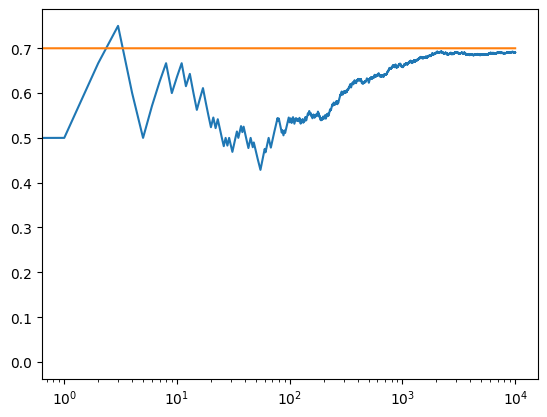

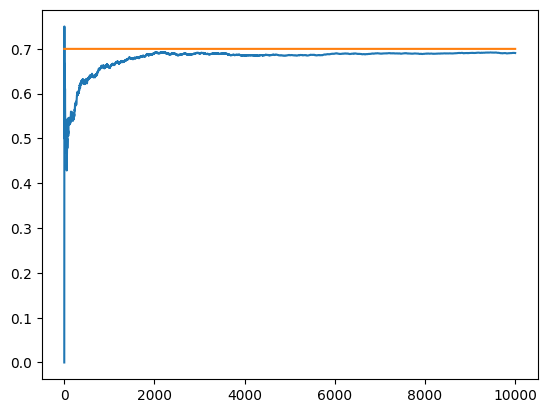

0.16666666666666666
0.4888888888888889
0.6945428773919197
total reward earned: 6908.0
overall win rate: 0.6908
num times selected each bandit: [36, 90, 9877]


array([0.        , 0.5       , 0.66666667, ..., 0.69083817, 0.69086909,
       0.6908    ])

In [54]:
experiment()